In [1]:
#import all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import ml_metrics as metrics

In [2]:
#load datasets
train_10k = pd.read_csv('train_downsampled_10k.csv')
train_11k = pd.read_csv('train_downsampled_11k.csv')
train_12k = pd.read_csv('train_downsampled_12k.csv')
train_13k = pd.read_csv('train_downsampled_13k.csv')
train_14k = pd.read_csv('train_downsampled_14k.csv')
train_15k = pd.read_csv('train_downsampled_15k.csv')

In [3]:
# Drop unnecessary features
train_10k = train_10k.drop(['date_time'], axis=1)
train_10k = train_10k.drop(['srch_ci'], axis=1)
train_10k = train_10k.drop(['srch_co'], axis=1)

train_11k = train_11k.drop(['date_time'], axis=1)
train_11k = train_11k.drop(['srch_ci'], axis=1)
train_11k = train_11k.drop(['srch_co'], axis=1)

train_12k = train_12k.drop(['date_time'], axis=1)
train_12k = train_12k.drop(['srch_ci'], axis=1)
train_12k = train_12k.drop(['srch_co'], axis=1)

train_13k = train_13k.drop(['date_time'], axis=1)
train_13k = train_13k.drop(['srch_ci'], axis=1)
train_13k = train_13k.drop(['srch_co'], axis=1)

train_14k = train_14k.drop(['date_time'], axis=1)
train_14k = train_14k.drop(['srch_ci'], axis=1)
train_14k = train_14k.drop(['srch_co'], axis=1)

train_15k = train_15k.drop(['date_time'], axis=1)
train_15k = train_15k.drop(['srch_ci'], axis=1)
train_15k = train_15k.drop(['srch_co'], axis=1)

In [4]:
#Split the data
train_new_10k = train_10k[((train_10k.year == 2013) | ((train_10k.year == 2014) & (train_10k.month < 8)))]
test_new_10k = train_10k[((train_10k.year == 2014) & (train_10k.month >= 8))]
train_new_11k = train_11k[((train_11k.year == 2013) | ((train_11k.year == 2014) & (train_11k.month < 8)))]
test_new_11k = train_11k[((train_11k.year == 2014) & (train_11k.month >= 8))]
train_new_12k = train_12k[((train_12k.year == 2013) | ((train_12k.year == 2014) & (train_12k.month < 8)))]
test_new_12k = train_12k[((train_12k.year == 2014) & (train_12k.month >= 8))]
train_new_13k = train_13k[((train_13k.year == 2013) | ((train_13k.year == 2014) & (train_13k.month < 8)))]
test_new_13k = train_13k[((train_13k.year == 2014) & (train_13k.month >= 8))]
train_new_14k = train_14k[((train_14k.year == 2013) | ((train_14k.year == 2014) & (train_14k.month < 8)))]
test_new_14k = train_14k[((train_14k.year == 2014) & (train_14k.month >= 8))]
train_new_15k = train_15k[((train_15k.year == 2013) | ((train_15k.year == 2014) & (train_15k.month < 8)))]
test_new_15k = train_15k[((train_11k.year == 2014) & (train_15k.month >= 8))]

In [5]:
test_new_10k = test_new_10k[test_new_10k.is_booking == 1]
test_new_11k = test_new_11k[test_new_11k.is_booking == 1]
test_new_12k = test_new_12k[test_new_12k.is_booking == 1]
test_new_13k = test_new_13k[test_new_13k.is_booking == 1]
test_new_14k = test_new_14k[test_new_14k.is_booking == 1]
test_new_15k = test_new_15k[test_new_15k.is_booking == 1]

In [6]:
X_train_new_10k = train_new_10k.drop(['hotel_cluster'], axis=1)
Y_train_new_10k = train_new_10k['hotel_cluster']
X_train_new_11k = train_new_11k.drop(['hotel_cluster'], axis=1)
Y_train_new_11k = train_new_11k['hotel_cluster']
X_train_new_12k = train_new_12k.drop(['hotel_cluster'], axis=1)
Y_train_new_12k = train_new_12k['hotel_cluster']
X_train_new_13k = train_new_13k.drop(['hotel_cluster'], axis=1)
Y_train_new_13k = train_new_13k['hotel_cluster']
X_train_new_14k = train_new_14k.drop(['hotel_cluster'], axis=1)
Y_train_new_14k = train_new_14k['hotel_cluster']
X_train_new_15k = train_new_15k.drop(['hotel_cluster'], axis=1)
Y_train_new_15k = train_new_15k['hotel_cluster']

In [7]:
def mean_average_precision(y_test, y_pred_proba):
    y_pred_k = np.array([y_pred_proba[i].argsort()[-5:][::-1] 
        for i in range(len(y_test))]) # k=5 most likely predicted classes for each input
    map_score = metrics.mapk(y_test.values[np.newaxis].T, y_pred_k, 5)
    return map_score

In [8]:
from xgboost import XGBClassifier

xgb_10k = XGBClassifier()
xgb_11k = XGBClassifier()
xgb_12k = XGBClassifier()
xgb_13k = XGBClassifier()
xgb_14k = XGBClassifier()
xgb_15k = XGBClassifier()

In [9]:
xgb_10k.fit(X_train_new_10k, Y_train_new_10k)
xgb_11k.fit(X_train_new_11k, Y_train_new_11k)
xgb_12k.fit(X_train_new_12k, Y_train_new_12k)
xgb_13k.fit(X_train_new_13k, Y_train_new_13k)
xgb_14k.fit(X_train_new_14k, Y_train_new_14k)
xgb_15k.fit(X_train_new_15k, Y_train_new_15k)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [10]:
X_test_new_10k = test_new_10k.drop(['hotel_cluster'], axis=1)
Y_test_new_10k = test_new_10k['hotel_cluster']
X_test_new_11k = test_new_11k.drop(['hotel_cluster'], axis=1)
Y_test_new_11k = test_new_11k['hotel_cluster']
X_test_new_12k = test_new_12k.drop(['hotel_cluster'], axis=1)
Y_test_new_12k = test_new_12k['hotel_cluster']
X_test_new_13k = test_new_13k.drop(['hotel_cluster'], axis=1)
Y_test_new_13k = test_new_13k['hotel_cluster']
X_test_new_14k = test_new_14k.drop(['hotel_cluster'], axis=1)
Y_test_new_14k = test_new_14k['hotel_cluster']
X_test_new_15k = test_new_15k.drop(['hotel_cluster'], axis=1)
Y_test_new_15k = test_new_15k['hotel_cluster']

In [11]:
Y_test_pred_10k = xgb_10k.predict(X_test_new_10k)
Y_test_pred_proba_10k = xgb_10k.predict_proba(X_test_new_10k)
Y_test_pred_11k = xgb_11k.predict(X_test_new_11k)
Y_test_pred_proba_11k = xgb_11k.predict_proba(X_test_new_11k)
Y_test_pred_12k = xgb_12k.predict(X_test_new_12k)
Y_test_pred_proba_12k = xgb_12k.predict_proba(X_test_new_12k)
Y_test_pred_13k = xgb_13k.predict(X_test_new_13k)
Y_test_pred_proba_13k = xgb_13k.predict_proba(X_test_new_13k)
Y_test_pred_14k = xgb_14k.predict(X_test_new_14k)
Y_test_pred_proba_14k = xgb_14k.predict_proba(X_test_new_14k)
Y_test_pred_15k = xgb_15k.predict(X_test_new_15k)
Y_test_pred_proba_15k = xgb_15k.predict_proba(X_test_new_15k)

In [12]:
print(Y_test_pred_proba_10k)

[[3.0547988e-05 8.2117949e-06 1.2764915e-02 ... 2.3689677e-03
  7.1358413e-04 6.2460271e-03]
 [1.1101558e-03 6.4591550e-06 1.7577643e-03 ... 1.1092214e-03
  9.7801331e-03 2.9394273e-03]
 [1.8824163e-06 2.7189230e-06 1.6062108e-03 ... 2.9818770e-05
  9.9308068e-05 7.0752035e-04]
 ...
 [6.5805425e-04 5.9508557e-06 8.6443834e-03 ... 4.0433629e-04
  1.2265281e-03 6.8034190e-03]
 [1.2666256e-04 2.5541427e-05 2.7293226e-02 ... 1.3404728e-02
  6.0613686e-03 3.0561266e-02]
 [1.8460200e-03 7.6331289e-06 3.1501912e-03 ... 1.0334338e-02
  3.5786953e-02 1.4299246e-02]]


In [13]:
accuracy_10k = accuracy_score(Y_test_new_10k, Y_test_pred_10k)
print('Accuracy', accuracy_10k)
accuracy_11k = accuracy_score(Y_test_new_11k, Y_test_pred_11k)
print('Accuracy', accuracy_11k)
accuracy_12k = accuracy_score(Y_test_new_12k, Y_test_pred_12k)
print('Accuracy', accuracy_12k)
accuracy_13k = accuracy_score(Y_test_new_13k, Y_test_pred_13k)
print('Accuracy', accuracy_13k)
accuracy_14k = accuracy_score(Y_test_new_14k, Y_test_pred_14k)
print('Accuracy', accuracy_14k)
accuracy_15k = accuracy_score(Y_test_new_15k, Y_test_pred_15k)
print('Accuracy', accuracy_15k)

Accuracy 0.13228600792835118
Accuracy 0.13431092655073967
Accuracy 0.14040806471085354
Accuracy 0.13594570928196148
Accuracy 0.12949492879827887
Accuracy 0.31871001436218827


In [14]:
map_10k = mean_average_precision(Y_test_new_10k, Y_test_pred_proba_10k)
print("Mean Average Precision@5", map_10k)
map_11k = mean_average_precision(Y_test_new_11k, Y_test_pred_proba_11k)
print("Mean Average Precision@5", map_11k)
map_12k = mean_average_precision(Y_test_new_12k, Y_test_pred_proba_12k)
print("Mean Average Precision@5", map_12k)
map_13k = mean_average_precision(Y_test_new_13k, Y_test_pred_proba_13k)
print("Mean Average Precision@5", map_13k)
map_14k = mean_average_precision(Y_test_new_14k, Y_test_pred_proba_14k)
print("Mean Average Precision@5", map_14k)
map_15k = mean_average_precision(Y_test_new_15k, Y_test_pred_proba_15k)
print("Mean Average Precision@5", map_15k)

Mean Average Precision@5 0.22788870944061076
Mean Average Precision@5 0.2317890821005277
Mean Average Precision@5 0.23477001086562838
Mean Average Precision@5 0.23089608873321657
Mean Average Precision@5 0.22716934740293004
Mean Average Precision@5 0.4123688906297602


In [15]:
mapk_scores = [map_10k, map_11k, map_12k, map_13k, map_14k, map_15k]

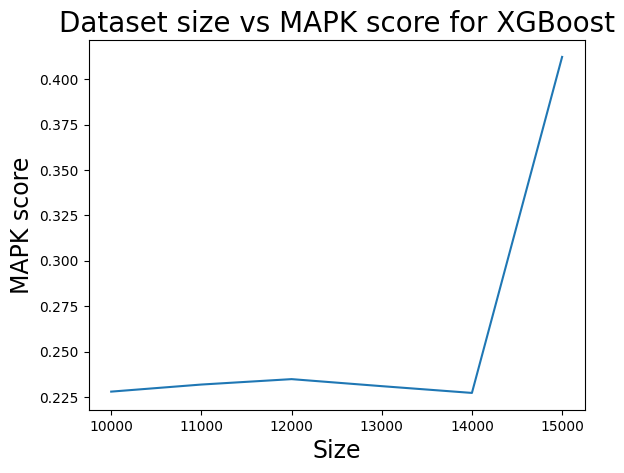

In [16]:
dataset_size = [10000, 11000, 12000, 13000, 14000, 15000]

plt.plot(dataset_size,mapk_scores)
plt.title("Dataset size vs MAPK score for XGBoost",fontsize=20)
plt.xlabel("Size",fontsize=17)
plt.ylabel("MAPK score",fontsize=17)
plt.show()

In [17]:
from sklearn.metrics import make_scorer
map_score = make_scorer(mean_average_precision, needs_proba=True, greater_is_better=True)

In [18]:
# gridsearchcv to find best n_estimators and learning_rate

param_grid_xgb = {'n_estimators':[300,400,500], 'learning_rate':[.1,.2,.3]}

In [19]:
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier()
xgb_grid = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, scoring=map_score, cv=3)
xgb_grid.fit(X_train_new_15k, Y_train_new_15k)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'n_estimators': [300, 400, 500]},
             scoring=make_scorer(mean_average_precision, needs_proba=True))

In [20]:
print(xgb_grid.best_params_)

{'learning_rate': 0.1, 'n_estimators': 300}


In [21]:
y_test_grid = xgb_grid.predict(X_test_new_15k)
y_test_proba_grid = xgb_grid.predict_proba(X_test_new_15k)

In [22]:
accuracy_grid = accuracy_score(Y_test_new_15k, y_test_grid)
print('Accuracy after gridsearch', accuracy_grid)

Accuracy after gridsearch 0.3224964094529312


In [23]:
map_grid = mean_average_precision(Y_test_new_15k, y_test_proba_grid)
print("Mean Average Precision@5 after gridsearch", map_grid)

Mean Average Precision@5 after gridsearch 0.41702789746268004
